In [1]:
# 1 : Imports
import os
os.chdir('../')  # Moving up one directory to the root
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from data.data_processing import DataProcessor, TextSignals, SarcasmAugmenter
from utils.dataVisualizer import DataVisualizer
from models.sentiment_model import ModelTrainer

2024-12-16 12:31:57.612889: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# 2 : Create instances
dataProcessor = DataProcessor()
dataVisualizer = DataVisualizer(data_processor=dataProcessor)
trainer = ModelTrainer()

In [3]:
# Cell 3: Load raw dataset and analyze initial distribution
df = dataProcessor.load_data()
print("\nInitial Distribution Analysis:")
dataVisualizer.analyze_ratings_distribution(df)
dataVisualizer.analyze_sentiment_distribution(df)


Raw Dataset

   label                                               text
0      4  dr. goldberg offers everything i look for in a...
1      1  Unfortunately, the frustration of being Dr. Go...
2      3  Been going to Dr. Goldberg for over 10 years. ...
3      3  Got a letter in the mail last week that said D...
4      0  I don't know what Dr. Goldberg was like before...

Sentiment added

   label                                               text  \
0      4  dr. goldberg offers everything i look for in a...   
1      1  Unfortunately, the frustration of being Dr. Go...   
2      3  Been going to Dr. Goldberg for over 10 years. ...   
3      3  Got a letter in the mail last week that said D...   
4      0  I don't know what Dr. Goldberg was like before...   

                                      processed_text  is_sarcastic  sentiment  
0  dr. goldberg offers everything i look for in a...         False          2  
1  unfortunately, the frustration of being dr. go...         False   

In [4]:
# Cell 4: Process and prepare balanced dataset
data = dataProcessor.prepare_data()
train_df = data['dataframes']['train']
val_df = data['dataframes']['val']
test_df = data['dataframes']['test']
model_inputs = data['model_inputs']

Creating dataset with 2000 samples per class

Raw Dataset

   label                                               text
0      4  dr. goldberg offers everything i look for in a...
1      1  Unfortunately, the frustration of being Dr. Go...
2      3  Been going to Dr. Goldberg for over 10 years. ...
3      3  Got a letter in the mail last week that said D...
4      0  I don't know what Dr. Goldberg was like before...

Sentiment added

   label                                               text  \
0      4  dr. goldberg offers everything i look for in a...   
1      1  Unfortunately, the frustration of being Dr. Go...   
2      3  Been going to Dr. Goldberg for over 10 years. ...   
3      3  Got a letter in the mail last week that said D...   
4      0  I don't know what Dr. Goldberg was like before...   

                                      processed_text  is_sarcastic  sentiment  
0  dr. goldberg offers everything i look for in a...         False          2  
1  unfortunately, the fr

In [5]:
# Cell 5: Analyze data splits distributions
for split_name, split_df in [('Training', train_df), ('Validation', val_df), ('Test', test_df)]:
    print(f"\n{split_name} Set Analysis:")
    print(f"Total samples: {len(split_df)}")
    print("\nSentiment Distribution:")
    print(split_df['sentiment'].value_counts().sort_index())
    print("\nSarcasm Distribution:")
    print(split_df['is_sarcastic'].value_counts())


Training Set Analysis:
Total samples: 6000

Sentiment Distribution:
sentiment
0    2000
1    2000
2    2000
Name: count, dtype: int64

Sarcasm Distribution:
is_sarcastic
False    3600
True     2400
Name: count, dtype: int64

Validation Set Analysis:
Total samples: 6000

Sentiment Distribution:
sentiment
0    2000
1    2000
2    2000
Name: count, dtype: int64

Sarcasm Distribution:
is_sarcastic
False    5934
True       66
Name: count, dtype: int64

Test Set Analysis:
Total samples: 6000

Sentiment Distribution:
sentiment
0    2000
1    2000
2    2000
Name: count, dtype: int64

Sarcasm Distribution:
is_sarcastic
False    5936
True       64
Name: count, dtype: int64



Text Length Analysis Across Splits:

Training Set Text Lengths:


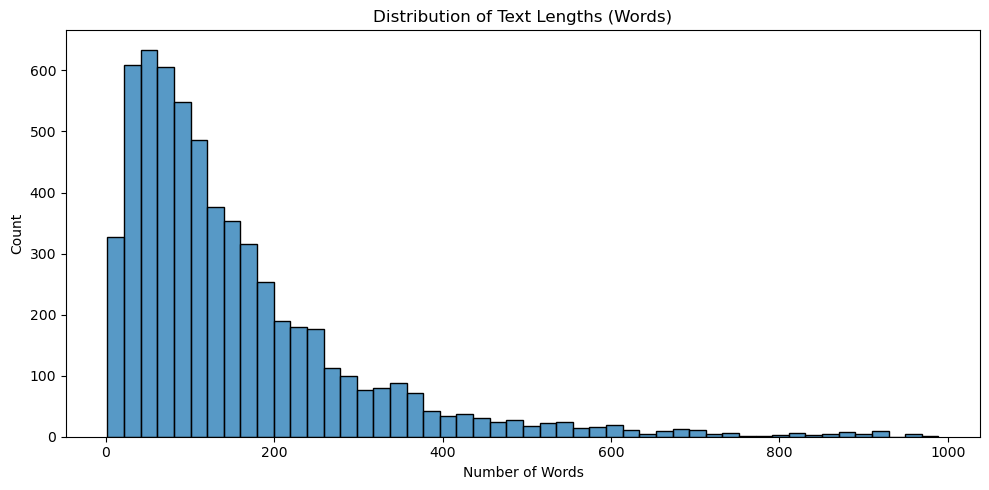


Text Length Statistics:

Word counts:
Average length: 154.0 words
Median length: 111.0 words
Max length: 989 words
Min length: 2 words

Validation Set Text Lengths:


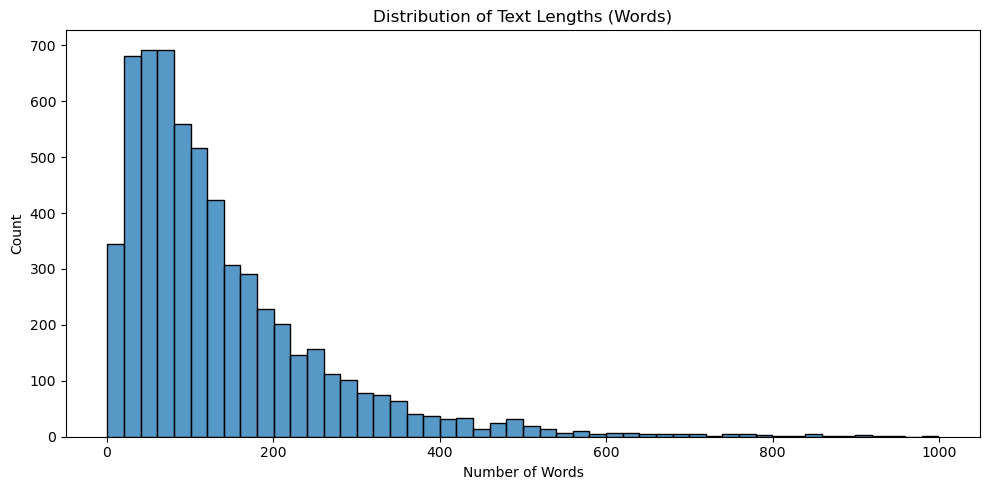


Text Length Statistics:

Word counts:
Average length: 137.1 words
Median length: 102.0 words
Max length: 999 words
Min length: 1 words

Test Set Text Lengths:


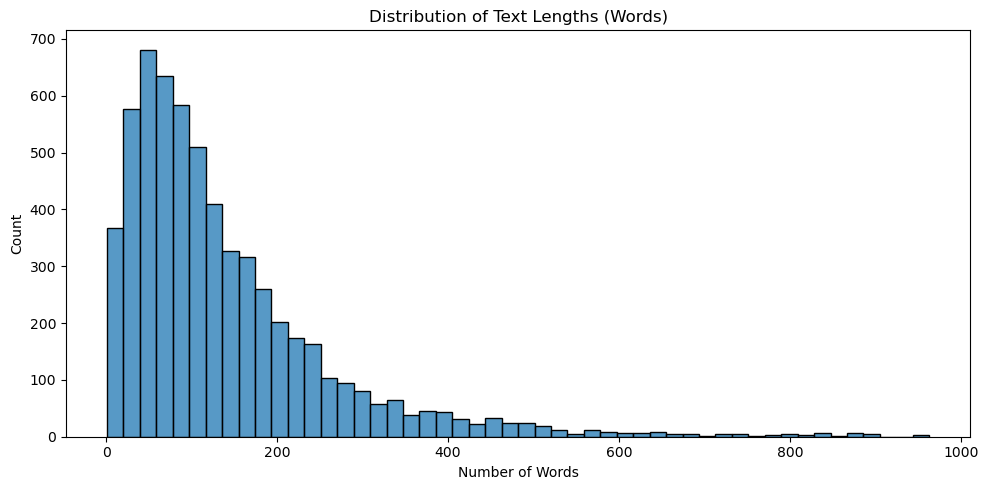


Text Length Statistics:

Word counts:
Average length: 139.2 words
Median length: 103.0 words
Max length: 963 words
Min length: 1 words


In [6]:
# Cell 6: Text length analysis
print("\nText Length Analysis Across Splits:")
for split_name, split_df in [('Training', train_df), ('Validation', val_df), ('Test', test_df)]:
    print(f"\n{split_name} Set Text Lengths:")
    dataVisualizer.analyze_text_lengths(split_df['text'])

Token Length Statistics:
Mean: 154.7
Median: 150.0
95th percentile: 256.0
Max: 256


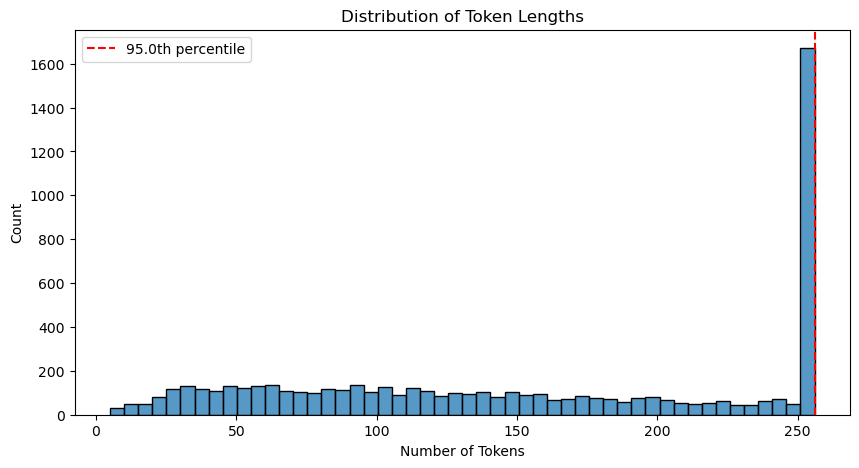


Recommended MAX_LENGTH: 256


In [7]:
# Cell 7: Token length analysis and MAX_LENGTH recommendation
encoded_data = trainer.prepare_dataset(train_df['text'])
suggested_length = dataVisualizer.analyze_token_lengths(encoded_data)
MAX_LENGTH = min(512, (suggested_length + 15) // 16 * 16)
print(f"\nRecommended MAX_LENGTH: {MAX_LENGTH}")

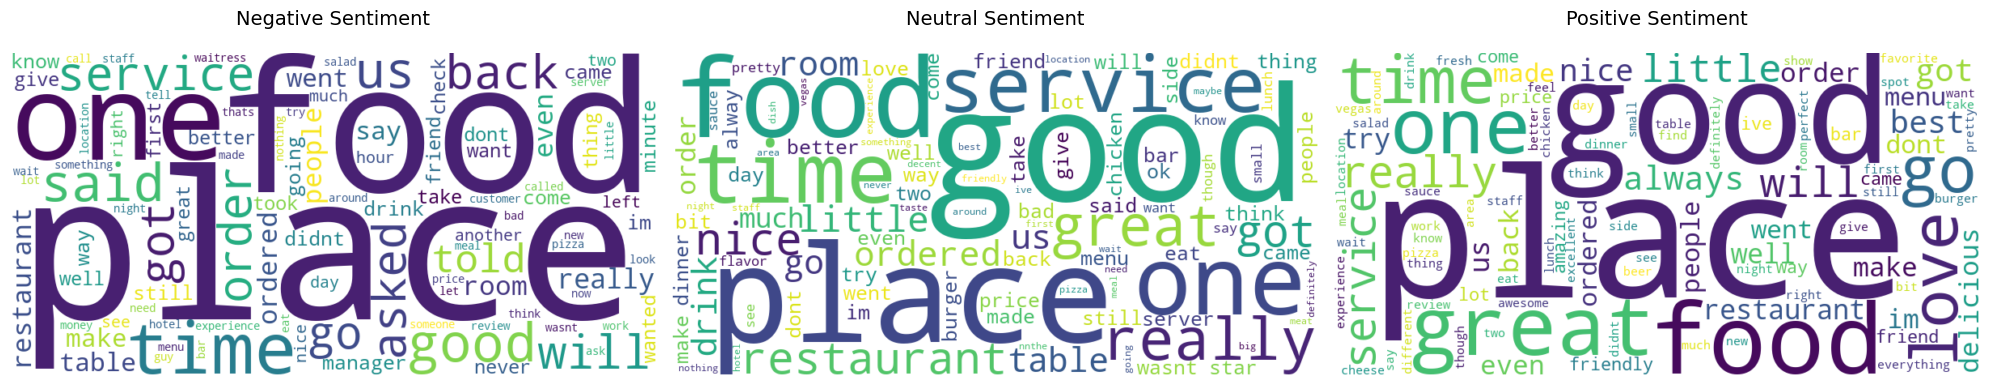


Most Common Words by Sentiment:

Negative:
  the: 18595
  and: 11280
  to: 10997
  was: 7184
  of: 5463
  it: 4940
  that: 4267
  for: 4191
  in: 4182
  my: 3739

Neutral:
  the: 15714
  and: 8759
  to: 6957
  was: 5767
  of: 4714
  it: 4195
  is: 3539
  for: 3529
  in: 3348
  but: 3052

Positive:
  the: 12095
  and: 8588
  to: 5508
  was: 3880
  of: 3813
  is: 3363
  it: 3062
  for: 2890
  in: 2864
  with: 2141


In [8]:
# Cell 8: Visualize word distributions
dataVisualizer.visualize_wordclouds(train_df)

In [23]:
# Cell 9: Sample reviews analysis
dataVisualizer.display_processed_reviews(train_df, num_samples=10)


Review #1782

Original Text:
It's taken me a while to write this, as this incident occurred the week the dealership moved to this new location...but the experience was so horrible, I have to share.\n\nMy car buying experience her...

Processed Text:
it is taken me a while to write this, as this incident occurred the week the dealership moved to this new location ELLIPSIS but the experience was so horrible, i have to share.\n\nmy car buying experi...

Labels and Metrics:
- Sentiment: 0 (Negative)
- Sarcasm Detected: True
- Polarity Score: 1.000

Review #3917

Original Text:
I really enjoy this place. The food is great and spicy and the lady working there is so friendly and remembered who I was when I went in the second time. I like that.\n\nThe red curry with tofu was so...

Processed Text:
I'm jumping for joy that totally i really enjoy this place. the food is great and spicy and the lady working there is so friendly and remembered who i was when i went in the second time. i like that


Text Signals Analysis for Training Set:


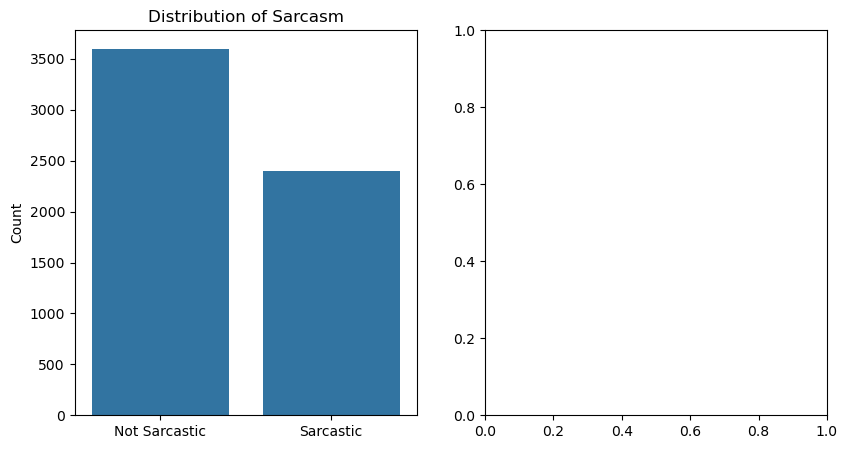

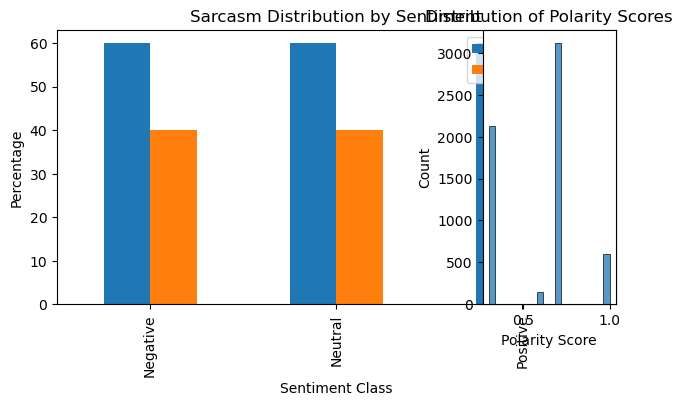


=== Text Signal Analysis ===
Total Reviews: 6,000

Sarcasm Detection:
- Sarcastic reviews: 2,400 (40.00%)
- Non-sarcastic reviews: 3,600 (60.00%)

Polarity Score Statistics:
- Mean: 0.586
- Median: 0.700
- Std Dev: 0.230


In [10]:
# Cell 10: Text signals analysis
print("\nText Signals Analysis for Training Set:")
dataVisualizer.analyze_text_signals(train_df)

In [11]:
# Cell 11: Data quality checks
print("Data Quality Checks:")
for split_name, split_df in [('Training', train_df), ('Validation', val_df), ('Test', test_df)]:
    print(f"\n{split_name} Set:")
    print("Null values:")
    print(split_df.isnull().sum())
    print(f"Duplicate rows: {split_df.duplicated().sum()}")

Data Quality Checks:

Training Set:
Null values:
text              0
processed_text    0
sentiment         0
is_sarcastic      0
polarity_score    0
dtype: int64
Duplicate rows: 1012

Validation Set:
Null values:
text              0
processed_text    0
sentiment         0
is_sarcastic      0
polarity_score    0
dtype: int64
Duplicate rows: 0

Test Set:
Null values:
text              0
processed_text    0
sentiment         0
is_sarcastic      0
polarity_score    0
dtype: int64
Duplicate rows: 0
